What happens to the fits of the beta distributions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
import matplotlib as mpl
import xarray as xr


In [3]:
ds = xr.open_dataset('../mod/test/cod_param_local.nc')
ds

<xarray.Dataset>
Dimensions:  (mu_d: 6, mu_h: 7)
Coordinates:
  * mu_h     (mu_h) float64 1e+03 3e+03 5e+03 7e+03 9e+03 1.1e+04 1.3e+04
  * mu_d     (mu_d) float64 0.0 0.7 1.4 2.1 2.8 3.5
Data variables:
    mu       (mu_h, mu_d) float64 ...
    sigma    (mu_h, mu_d) float64 ...
    n        (mu_h, mu_d) float64 ...
Attributes:
    dh:       2000
    dd:       0.7

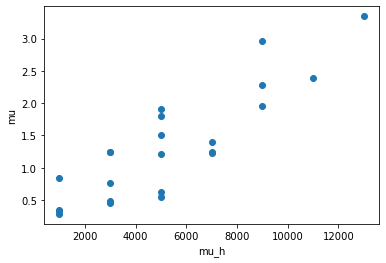

In [4]:
ds.plot.scatter('mu_h', 'mu')

In [5]:
def meanBeta(alpha, beta):
    return alpha / (alpha + beta)
params = ['alpha1', 'beta1', 'alpha2', 'beta2', 'p']

df = pd.read_csv('../fig/model1/cth_param.csv')
df_p = df.loc[(df.p < 1) & (df.p >0)]
df_p.loc[df_p.flag == 1]


df_np = df.loc[(df.p >= 1) | (df.p <= 0)]
df_np.loc[df_np.flag == 0]
# df_np
df['valid_p'] = (df.p < 1) & (df.p >0)
df['one_left_peak'] = (df.alpha1 < df.beta1)
df['two_left_peak'] = (df.alpha2 < df.beta2)
df['mean1'] = meanBeta(df.alpha1, df.beta1)
df['mean2'] = meanBeta(df.alpha2, df.beta2)

df.loc[df.valid_p]
print(df.loc[:2])

def switchDist(row):
    row.alpha1, row.beta1, row.alpha2, row.beta2, row.p, row.mean1, row.mean2 = row.alpha2, row.beta2, row.alpha1, row.beta1, 1 - row.p , row.mean2, row.mean1
    return row

def fixInvalidP(row):
    if row.p > 1: 
        row.p = 1
        row.alpha2, row.beta2, row.mean2 = np.nan, np.nan, np.nan
    elif row.p < 0:
        row.p = 0
        row.alpha1, row.beta1, row.mean1 = np.nan, np.nan, np.nan
    return row

df = df.apply(fixInvalidP, axis = 1)

def switchBeta(row):
    if row.p < .5:
        row = switchDist(row)
    return row

df = df.apply(switchBeta , axis = 1)
df

   Unnamed: 0    alpha1     beta1    alpha2      beta2         p  flag  \
0           0  0.462503  2.394980  0.652303   2.632273 -0.517904   0.0   
1           1  0.717644  1.378381  5.146478  45.490593  0.460514   0.0   
2           2  1.674854  8.970321  6.236491   2.618215  0.826544   0.0   

   valid_p  one_left_peak  two_left_peak     mean1     mean2  
0    False           True           True  0.161857  0.198596  
1     True           True           True  0.342383  0.101635  
2     True           True          False  0.157335  0.704314  


,Unnamed: 0,alpha1,beta1,alpha2,beta2,p,flag,valid_p,one_left_peak,two_left_peak,mean1,mean2
0,0,0.652303,2.632273,NaN,NaN,1.000000,0.0,False,True,True,0.198596,NaN
1,1,5.146478,45.490593,0.717644,1.378381,0.539486,0.0,True,True,True,0.101635,0.342383
2,2,1.674854,8.970321,6.236491,2.618215,0.826544,0.0,True,True,False,0.157335,0.704314
3,3,0.745891,1.485191,9.306958,44.252174,0.614923,0.0,True,True,True,0.334318,0.173770
4,4,0.961806,1.949479,NaN,NaN,1.000000,0.0,False,True,True,0.330372,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,39.364069,12.562720,NaN,NaN,1.000000,0.0,False,True,False,0.758069,NaN
152,152,1.000000,1.000000,1.000000,1.000000,0.500000,1.0,True,False,False,0.500000,0.500000
153,153,45.074428,10.106406,NaN,NaN,1.000000,0.0,False,False,False,0.816849,NaN
154,154,48.905021,8.646082,NaN,NaN,1.000000,0.0,False,False,False,0.849767,NaN


In [6]:
df_plot = df.copy()
# df_plot[params] = df.apply(lambda row: row[params] if (row.valid_p) else row[params] * np.nan, axis = 1)
df_plot.loc[df_plot.flag == 1] = np.nan
# df.apply(lambda x: 0 if (x.alpha1 >1) else 1, axis=1)
# df_plot.loc[df_plot.flag == 1] 



Text(0.5, 0.98, 'Estimators of time distribution COD')

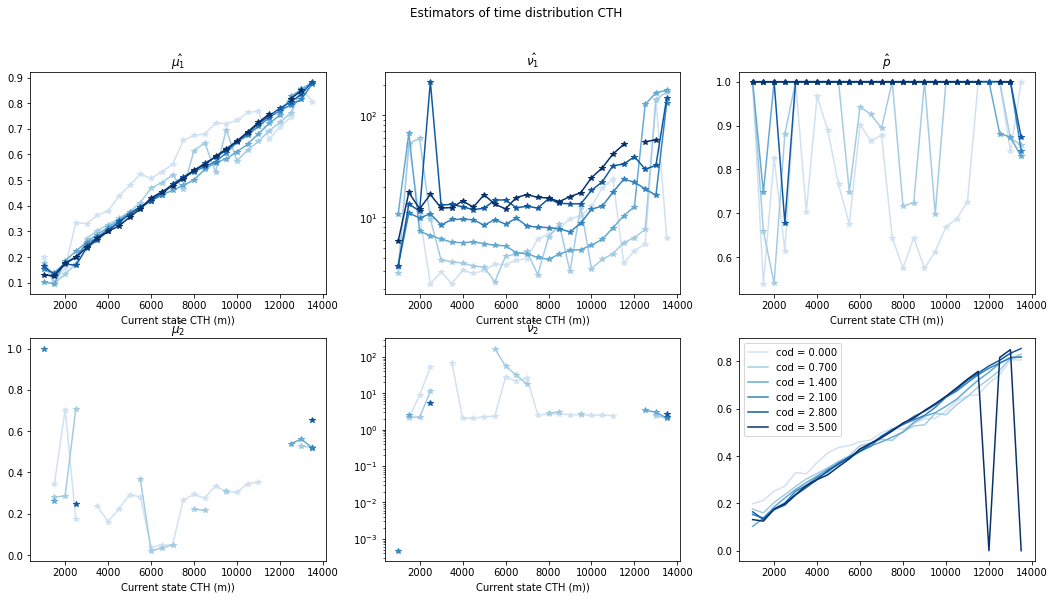

C:\Users\nerin\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


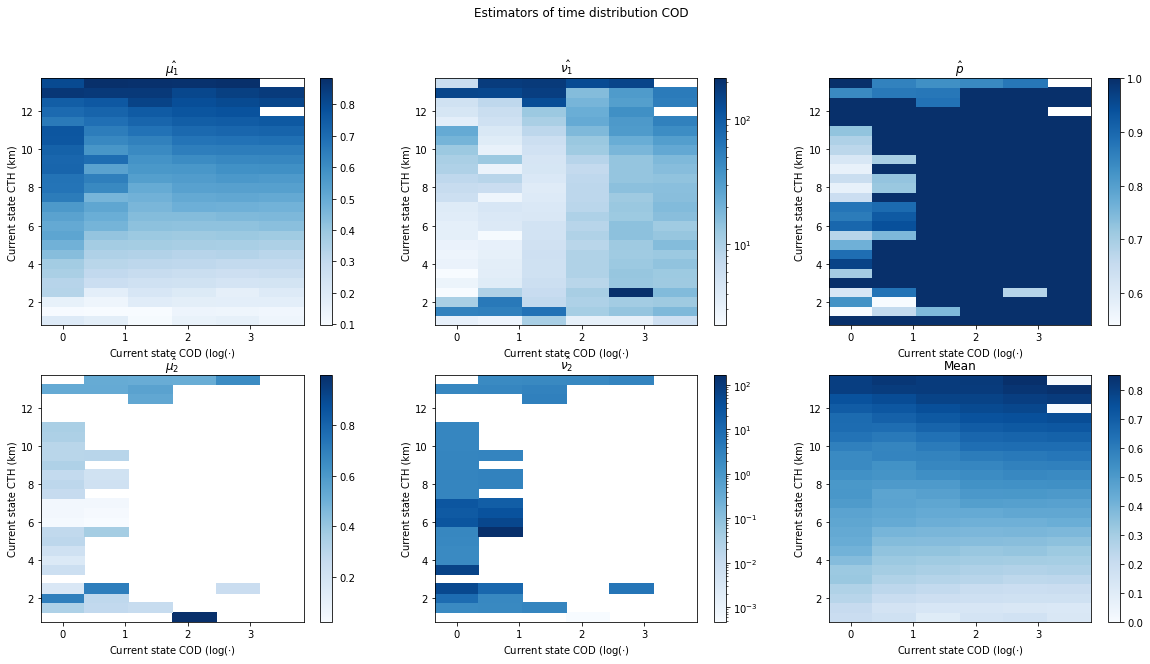

In [7]:
# cod estimators normal distribution
dh = 500
dd = .7
mu_h = np.arange(1e3, 14e3, dh) # m
mu_d = np.arange(0, 4, dd)
n_h = len(mu_h)
n_d = len(mu_d)
mu_h_ = np.append(mu_h - dh/2, mu_h.max() + dh/2) ## for pcolormesh
mu_d_ = np.append(mu_d - dd/2, mu_d.max() + dd/2) ## for pcolormesh
h_labels = [f'cod = {d:.3f}' for d in mu_d]

    
color= cm.Blues(np.linspace(.2,1, n_d))
color_ml= cm.Greens(np.linspace(.2,1, n_d))

    
cth_params = df_plot[['alpha1', 'beta1', 'alpha2', 'beta2', 'p']].values

fig, ax = plt.subplots(2, 3, figsize = (18, 9))

alpha1, beta1, alpha2, beta2, p = [a.reshape((n_d, n_h)) for a in cth_params.T]

mu1 = meanBeta(alpha1, beta1)
nu1 = alpha1 + beta1
mu2 = meanBeta(alpha2, beta2)
nu2 = alpha2 + beta2

mean = np.nansum(np.dstack((p * mu1,(1 - p) * mu2)),2)

title = ['$\\hat{\\mu_1}$', '$\\hat{\\nu_1}$', '$\\hat{p}$', 
         '$\\hat{\\mu_2}$', '$\\hat{\\nu_2}$', 'Mean']

for i, c, c_ml, label in zip(range(n_d), color, color_ml, h_labels):
    ax[0,0].plot(mu_h, mu1[i,:], label = label, c = c, 
                marker = '*', 
               # ls = '--'
               )
    ax[0,1].plot(mu_h, nu1[i,:], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[0,1].set(yscale = 'log')
    ax[0,2].plot(mu_h, p[i,:], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,0].plot(mu_h, mu2[i,:], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,1].plot(mu_h, nu2[i,:], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,1].set(yscale = 'log')

    ax[1,2].plot(mu_h, mean[i,:], label = label, c = c)
    ax[1,2].legend()

for axs, titles in zip(ax.flatten()[:-1], title):
    axs.set(xlabel = 'Current state CTH (m))',
          # ylabel = '$\hat{\mu_d}$',
          title = titles)
#     if titles != '$\\hat{p}$':
#         axs.set(yscale = 'log')
    


fig.suptitle('Estimators of time distribution CTH')


fig, ax = plt.subplots(2, 3, figsize = (20, 10))

im = ax[0,0].pcolormesh(mu_d_, mu_h_ * 1e-3, mu1.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,0],
             # label = title[0]
             )

im = ax[0,1].pcolormesh(mu_d_, mu_h_ * 1e-3, nu1.T, cmap = cm.Blues, norm=mpl.colors.LogNorm())
plt.colorbar(im, ax=ax[0,1],
             # label = title[1]
             )
im = ax[0,2].pcolormesh(mu_d_, mu_h_ * 1e-3, p.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,2],
             # label = title[2]
             )
im = ax[1,0].pcolormesh(mu_d_, mu_h_ * 1e-3, mu2.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,0],
             # label = title[3]
             )
im = ax[1,1].pcolormesh(mu_d_, mu_h_ * 1e-3, nu2.T, cmap = cm.Blues, norm=mpl.colors.LogNorm())
plt.colorbar(im, ax=ax[1,1],
             # label = title[4]
             )
im = ax[1,2].pcolormesh(mu_d_, mu_h_ * 1e-3, mean.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,2],
             # label = title[0]
             )

for axs, title in zip(ax.flatten()[:len(title)], title):
    axs.set(xlabel = 'Current state COD (log($\cdot$)',
          ylabel = 'Current state CTH (km)',
          title = title)

fig.suptitle('Estimators of time distribution COD')

In [8]:
# h_labels = [f'cod = {d * 1e-3} km' for d in mu_d]
df

,Unnamed: 0,alpha1,beta1,alpha2,beta2,p,flag,valid_p,one_left_peak,two_left_peak,mean1,mean2
0,0,0.652303,2.632273,NaN,NaN,1.000000,0.0,False,True,True,0.198596,NaN
1,1,5.146478,45.490593,0.717644,1.378381,0.539486,0.0,True,True,True,0.101635,0.342383
2,2,1.674854,8.970321,6.236491,2.618215,0.826544,0.0,True,True,False,0.157335,0.704314
3,3,0.745891,1.485191,9.306958,44.252174,0.614923,0.0,True,True,True,0.334318,0.173770
4,4,0.961806,1.949479,NaN,NaN,1.000000,0.0,False,True,True,0.330372,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,39.364069,12.562720,NaN,NaN,1.000000,0.0,False,True,False,0.758069,NaN
152,152,1.000000,1.000000,1.000000,1.000000,0.500000,1.0,True,False,False,0.500000,0.500000
153,153,45.074428,10.106406,NaN,NaN,1.000000,0.0,False,False,False,0.816849,NaN
154,154,48.905021,8.646082,NaN,NaN,1.000000,0.0,False,False,False,0.849767,NaN


Text(0.5, 0.98, 'Estimators of time distribution COD')

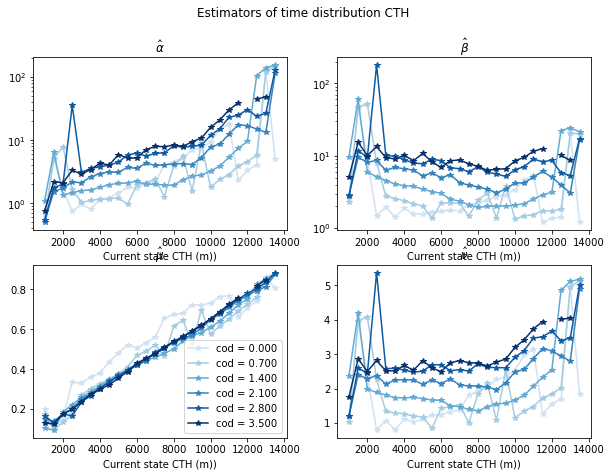

C:\Users\nerin\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


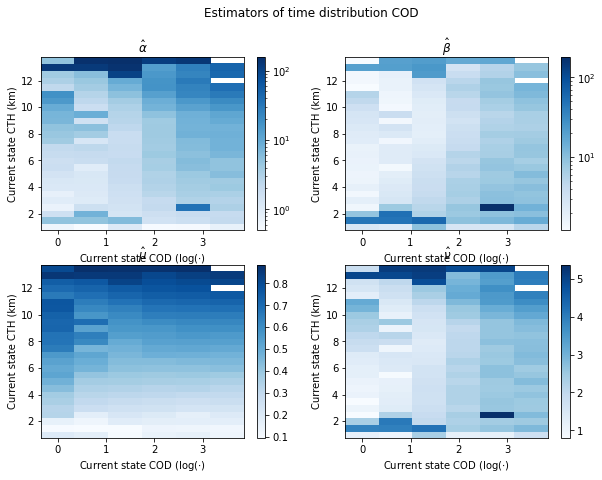

In [10]:
df = pd.read_csv('../fig/model1/cth_param_singlebeta.csv')
df

# cod estimators normal distribution
dh = 500
dd = .7
mu_h = np.arange(1e3, 14e3, dh) # m
mu_d = np.arange(0, 4, dd)
n_h = len(mu_h)
n_d = len(mu_d)
mu_h_ = np.append(mu_h - dh/2, mu_h.max() + dh/2) ## for pcolormesh
mu_d_ = np.append(mu_d - dd/2, mu_d.max() + dd/2) ## for pcolormesh
h_labels = [f'cod = {d:.3f}' for d in mu_d]

    
color= cm.Blues(np.linspace(.2,1, n_d))
color_ml= cm.Greens(np.linspace(.2,1, n_d))

    
cth_params = df_plot[['alpha1', 'beta1']].values

fig, ax = plt.subplots(2, 2, figsize = (10, 7))

alpha1, beta1 = [a.reshape((n_d, n_h)) for a in cth_params.T]

mu1 = meanBeta(alpha1, beta1)
nu1 = alpha1 + beta1

title = ['$\\hat{\\alpha}$', '$\\hat{\\beta}$', 
         '$\\hat{\\mu}$', '$\\hat{\\nu}$',]

for i, c, c_ml, label in zip(range(n_d), color, color_ml, h_labels):
    ax[0,0].plot(mu_h, alpha1[i,:], label = label, c = c, 
                marker = '*', 
               # ls = '--'
               )
    ax[0,0].set(yscale = 'log')
    ax[0,1].plot(mu_h, beta1[i,:], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[0,1].set(yscale = 'log')
    ax[1,0].plot(mu_h, mu1[i,:], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,1].plot(mu_h, np.log(nu1[i,:]), label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
#     ax[1,1].set(yscale = 'log')
    ax[1,0].legend()

for axs, titles in zip(ax.flatten(), title):
    axs.set(xlabel = 'Current state CTH (m))',
          # ylabel = '$\hat{\mu_d}$',
          title = titles)
#     if titles != '$\\hat{p}$':
#         axs.set(yscale = 'log')
    


fig.suptitle('Estimators of time distribution CTH')


fig, ax = plt.subplots(2, 2, figsize = (10, 7))

im = ax[0,0].pcolormesh(mu_d_, mu_h_ * 1e-3, alpha1.T, cmap = cm.Blues, norm=mpl.colors.LogNorm())
plt.colorbar(im, ax=ax[0,0],
             # label = title[0]
             )

im = ax[0,1].pcolormesh(mu_d_, mu_h_ * 1e-3, beta1.T, cmap = cm.Blues, norm=mpl.colors.LogNorm())
plt.colorbar(im, ax=ax[0,1],
             # label = title[1]
             )
im = ax[1,0].pcolormesh(mu_d_, mu_h_ * 1e-3, mu1.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,0],
             # label = title[3]
             )
im = ax[1,1].pcolormesh(mu_d_, mu_h_ * 1e-3,np.log(nu1.T), cmap = cm.Blues, 
#                         norm=mpl.colors.LogNorm()
                       )
plt.colorbar(im, ax=ax[1,1],
             # label = title[4]
             )


for axs, title in zip(ax.flatten()[:len(title)], title):
    axs.set(xlabel = 'Current state COD (log($\cdot$)',
          ylabel = 'Current state CTH (km)',
          title = title)

fig.suptitle('Estimators of time distribution COD')